# **UNDERSTANDING THE EV (ELECTRIC VEHICLE) INDUSTRY**

## Importing the libraries

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

## Reading data

In [7]:
df = pd.read_csv(r"C:\Users\Electric_Vehicle_Population_Data.csv")

In [8]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1N4BZ0CP5G,King,Seattle,WA,98125.0,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,349455557,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,KNDJX3AEXG,King,Renton,WA,98058.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,31950.0,11.0,210641315,POINT (-122.08747 47.4466),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJ3E1EB2J,King,Seattle,WA,98115.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,43.0,171417494,POINT (-122.31676 47.68156),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,1C4RJXN64R,Kitsap,Bremerton,WA,98312.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,26.0,262542927,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC,5.303508e+10
4,5YJ3E1EB1J,Thurston,Olympia,WA,98512.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,35.0,110432815,POINT (-122.9131 47.01359),PUGET SOUND ENERGY INC,5.306701e+10


## Data Cleaning

In [10]:
df.isna().sum()

VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        20
Base MSRP                                             20
Legislative District                                 553
DOL Vehicle ID                                         0
Vehicle Location                                      11
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64

In [12]:
df.duplicated().sum()

0

In [16]:
#removing rows with missing values

df = df.dropna(subset = ['Legislative District', 'Electric Range', 'Base MSRP', 'Vehicle Location'])

In [17]:
df.drop(['DOL Vehicle ID', 'Vehicle Location', 'VIN (1-10)'], axis = 1 , inplace = True)

## Visualizing the data

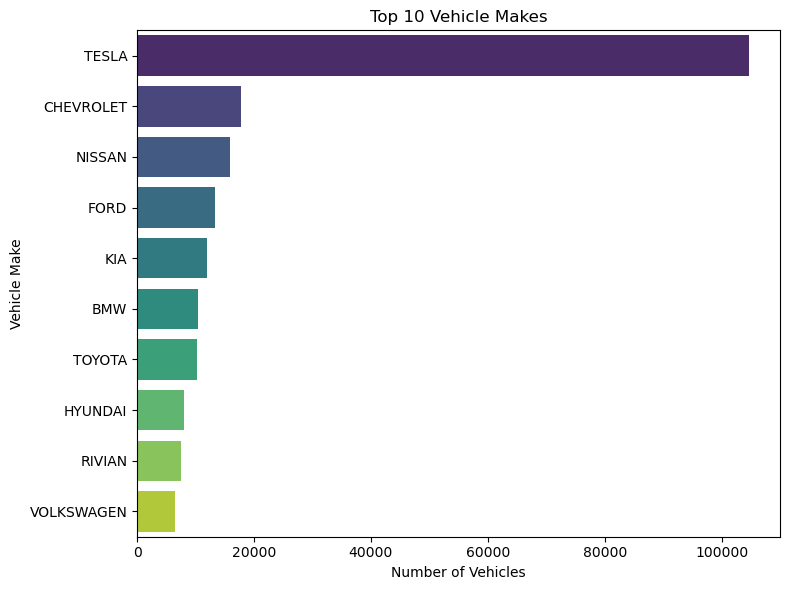

In [31]:
#Top 10 Vehicles

# Get the top 10 makes with their counts
top_models = df['Make'].value_counts().nlargest(10)

# Convert to DataFrame for seaborn
top_models_df = top_models.reset_index()
top_models_df.columns = ['Make', 'Count']

# Reverse order for top-to-bottom plotting
#top_models_df = top_models_df.iloc[::-1]

# Plot
plt.figure(figsize = (8,6))
sns.barplot(x = 'Count' , y = 'Make', data = top_models_df , palette = 'viridis')
plt.title ('Top 10 Vehicle Makes')
plt.xlabel ('Number of Vehicles')
plt.ylabel ('Vehicle Make')
plt.tight_layout()
plt.show()


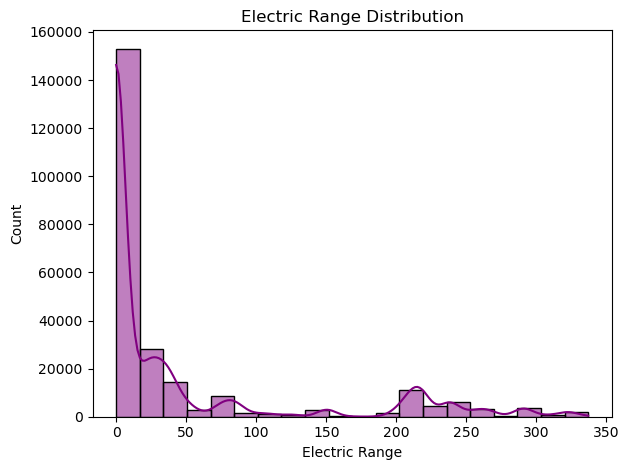

In [44]:
# Electric Range for Vehicles

sns.histplot(df['Electric Range'], bins = 20, kde = True, color = 'purple')
plt.title('Electric Range Distribution')
plt.tight_layout()
plt.show()

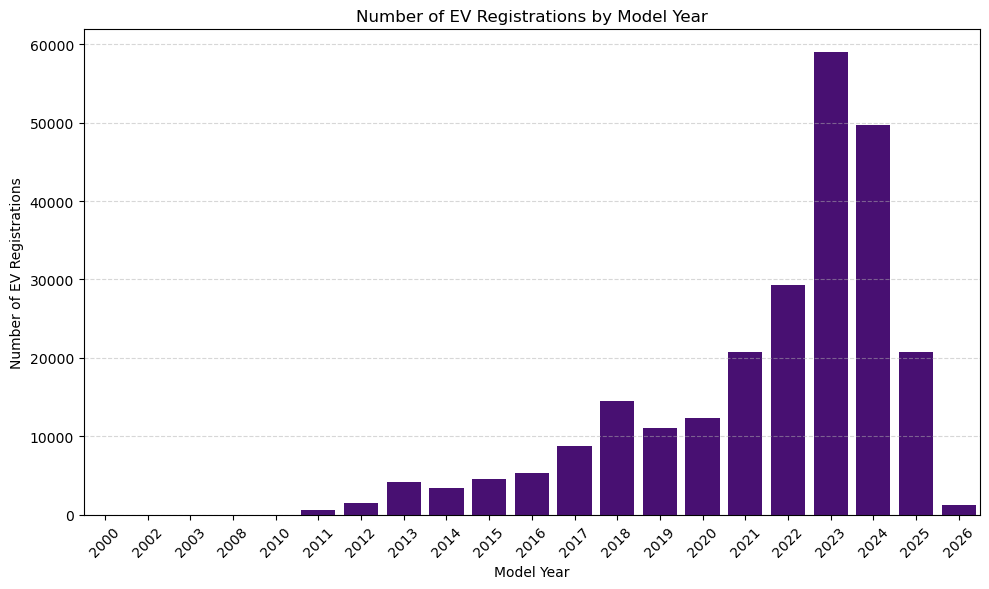

In [54]:
# Number of EV Registrations by Model Year

#count and sort by model year

model_year_counts = df['Model Year'].value_counts().sort_index()
model_year_df = model_year_counts.reset_index()
model_year_df.columns = ['Model Year', 'Number of EV Registrations']

#plot
plt.figure(figsize = (10,6))
sns.barplot(data = model_year_df, x = 'Model Year', y = 'Number of EV Registrations', color = 'indigo')
plt.title('Number of EV Registrations by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Number of EV Registrations')
plt.xticks(rotation = 45)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.5)
plt.tight_layout()
plt.show()

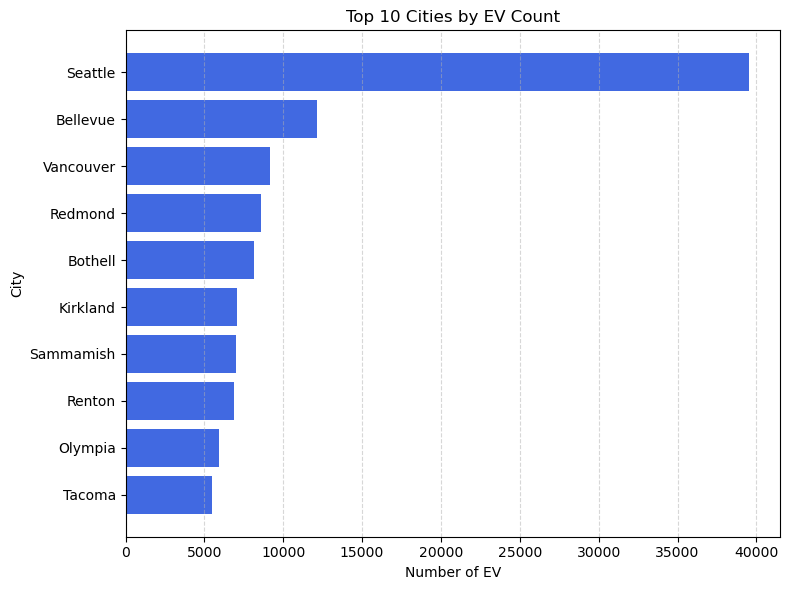

In [64]:
#Top 10 cities with EV vehicles

#get top 10 cities and the vehicle count
top_cities = df['City'].value_counts().nlargest(10)
cities = top_cities.index
counts = top_cities.values

#plot
plt.figure(figsize = (8,6))
bars = plt.barh(cities, counts, color = 'royalblue')
plt.title('Top 10 Cities by EV Count')
plt.xlabel('Number of EV')
plt.ylabel('City')
plt.gca().invert_yaxis() #largest value top
plt.grid(axis = 'x', linestyle = '--', alpha =0.5)
plt.tight_layout()
plt.show()


#for bar in bars:
 #   plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2,
  #           f'{int(bar.get_width())}', va = 'center')

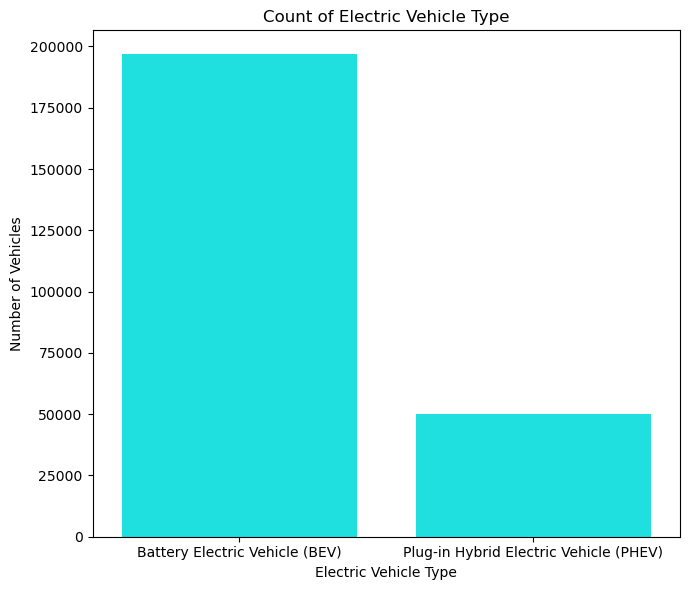

In [73]:
#Vehicle type by count

ev_type_counts = df['Electric Vehicle Type'].value_counts().reset_index()
ev_type_counts.columns = ['Electric Vehicle Type', 'Count']

#plot
plt.figure(figsize=(7,6))
sns.barplot(data = ev_type_counts, x = 'Electric Vehicle Type', y = 'Count', color = 'aqua')
plt.title('Count of Electric Vehicle Type')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

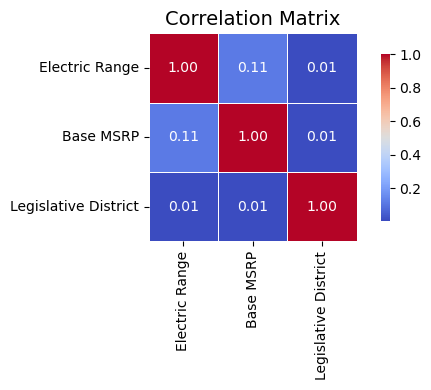

In [74]:
# Compute correlation matrix
corr_matrix = df[['Electric Range', 'Base MSRP', 'Legislative District']].corr()

# Plot with custom styling
plt.figure(figsize=(6, 4))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Matrix", fontsize=14)
plt.tight_layout()
plt.show()

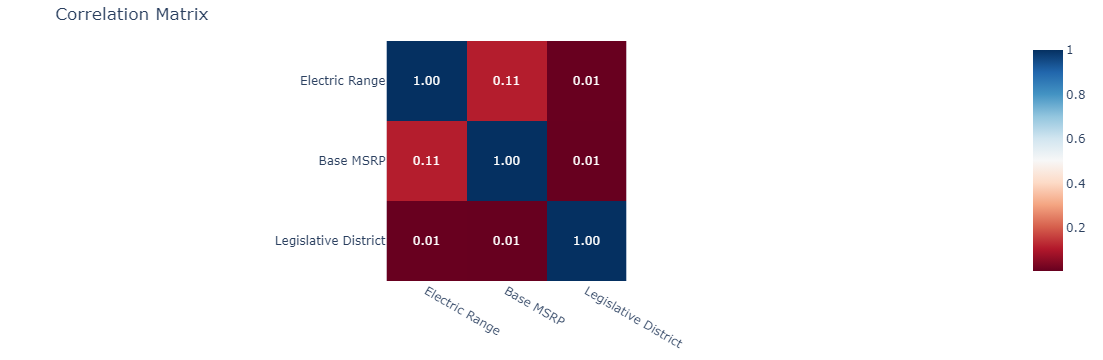

In [86]:
# Compute correlation matrix
corr_matrix = df[['Electric Range', 'Base MSRP', 'Legislative District']].corr()

# Plot interactive heatmap
fig = px.imshow(
    corr_matrix,
    text_auto='.2f',
    color_continuous_scale='RdBu',
    title='Correlation Matrix'
)

fig.update_layout(margin=dict(l=10, r=10, t=40, b=50))
fig.show()

## **Analysis Insights**

- Tesla has the highest number of Electric Vehicles (EVs), over 100,000
- Battery Electric Vehicles (BEVs) count for around 80% of all the Electric Vehicles
- Most Electric Vehicles (EVs) have a range below 100 miles
- Seattle has the highest number of Electric Vehicles (EVs)
- Electric Vehicle (EV) grew fast after 2015, and reached its peak registrations in the year 2023